<a href="https://colab.research.google.com/github/BryanDanielMartinezCabezas/Inteligencia_Artificial_AI_SIS420/blob/main/Lab02/05_reg_pol_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de programación Regresión Polinomial

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 2 Regresión polinomica

Se implementa la regresion polinomial para predecir el la capacidad adquisitiva de una persona. El archivo `Datasets/capacidad_adquisitiva.csv` contiene un dataset para entrenamiento de capacidad adquisitiva de las personas considerando la edad de las personas de la ciudad de Sucre. La primera columna es la edad y la segunda columna es la capacidad adquisitiva en bolivianos por mes.

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [3]:
# Importar la biblioteca pandas para manipulación de datos
import pandas as pd

# Cargar el dataset desde un archivo CSV en Google Drive usando pandas
data = pd.read_csv('/content/gdrive/MyDrive/Data sete lab 1/OTROS/weatherHistory.csv')

# Seleccionar las columnas de temperatura y temperatura aparente como variables de entrada (X)
# Aquí asumimos que las columnas están en la posición 3 y 4
X = data.iloc[:, [3, 4]].values   # Convertir las columnas seleccionadas a un array NumPy

# Seleccionar la columna de humedad como variable de salida (y)
# Aquí asumimos que la columna de humedad está en la posición 5
y = data.iloc[:, 5].values   # Convertir la columna seleccionada a un array NumPy

# Obtener el número total de muestras en el dataset
m = y.size

# Imprimir las primeras 20 muestras de datos de entrada (X) y salida (y) para verificación
for i in range(20):
    # Imprimir el valor de la temperatura y la humedad en un formato alineado
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))


       9         1
       9         1
       9         1
       8         1
       9         1
       9         1
       8         1
       9         1
      11         1
      14         1
      16         1
      17         1
      18         1
      17         1
      19         0
      19         0
      15         1
      16         1
      14         1
      13         1


La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar.

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (edades) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de las edades.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $.

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir la capacidad adquisitiva que no se han visto antes. Dado un nuevo valor de x (edad), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [4]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Humedad')
    pyplot.xlabel('Temperatura')


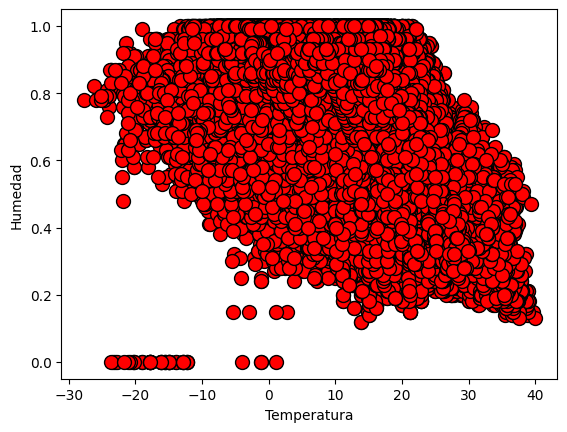

In [5]:
plotData(X, y)

In [6]:
X = np.concatenate([X, X * X], axis=1)

In [7]:
print(X)

[[  9.47222222   7.38888889  89.72299383  54.59567901]
 [  9.35555556   7.22777778  87.52641975  52.2407716 ]
 [  9.37777778   9.37777778  87.94271605  87.94271605]
 ...
 [ 22.03888889  22.03888889 485.71262346 485.71262346]
 [ 21.52222222  21.52222222 463.20604938 463.20604938]
 [ 20.43888889  20.43888889 417.74817901 417.74817901]]


In [8]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [9]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [10]:
print(X_norm)

[[-0.25759902 -0.32403547 -0.55261439 -0.68221539]
 [-0.26981351 -0.3390971  -0.56105    -0.69125839]
 [-0.26748694 -0.13810226 -0.55945127 -0.55416066]
 ...
 [ 1.0580761   1.04553403  0.96812406  0.97330096]
 [ 1.00398335  0.99723295  0.88169095  0.88687429]
 [ 0.89056308  0.89595648  0.70711686  0.71231319]]


Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

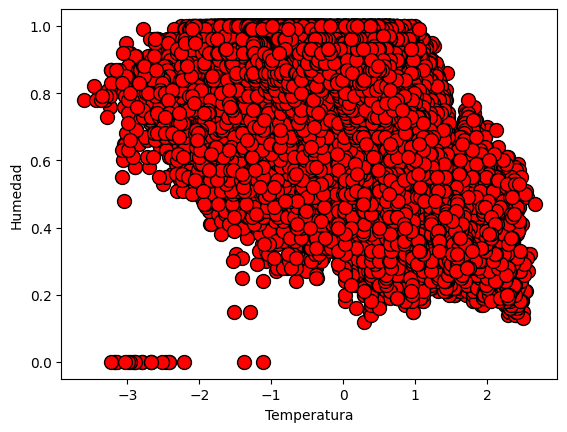

In [11]:
plotData(X_norm[:,1], y)

In [12]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.hstack([np.ones((m, 1)), X_norm])

In [13]:
print(X)

[[ 1.         -0.25759902 -0.32403547 -0.55261439 -0.68221539]
 [ 1.         -0.26981351 -0.3390971  -0.56105    -0.69125839]
 [ 1.         -0.26748694 -0.13810226 -0.55945127 -0.55416066]
 ...
 [ 1.          1.0580761   1.04553403  0.96812406  0.97330096]
 [ 1.          1.00398335  0.99723295  0.88169095  0.88687429]
 [ 1.          0.89056308  0.89595648  0.70711686  0.71231319]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

In [14]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [15]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        gradient = (1 / m) * np.dot(X.T, (np.dot(X, theta) - y))
        theta = theta - alpha * gradient
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


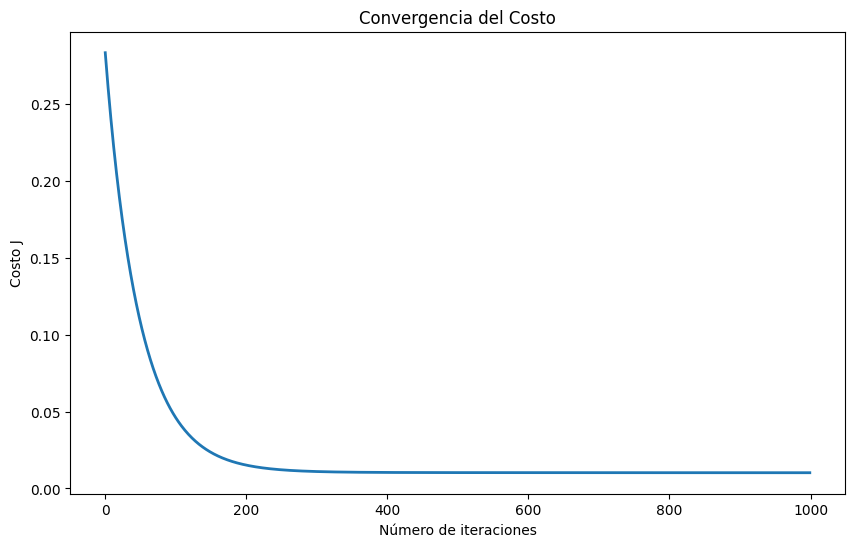

Theta calculado por el descenso del gradiente: [ 0.73486724 -0.02866602  0.00823091 -0.06496025 -0.0486168 ]
Humedad predicha (usando el descenso por el gradiente): 0.52


In [16]:
# Inicializar parámetros para el algoritmo de descenso por el gradiente
alpha = 0.01  # Tasa de aprendizaje
num_iters = 1000  # Número de iteraciones para el descenso por el gradiente

# Inicializar los parámetros theta con ceros
# El tamaño de theta debe ser igual al número de características en X
theta = np.zeros(X.shape[1])

# Ejecutar el descenso por el gradiente para encontrar los mejores valores de theta
# La función 'gradientDescentMulti' realiza el descenso por el gradiente y retorna theta y el historial de costos
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Graficar la convergencia del costo a lo largo de las iteraciones
import matplotlib.pyplot as pyplot

# Crear una figura para la gráfica
pyplot.figure(figsize=(10, 6))
# Graficar el costo en función del número de iteraciones
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')  # Etiqueta del eje x
pyplot.ylabel('Costo J')  # Etiqueta del eje y
pyplot.title('Convergencia del Costo')  # Título de la gráfica
pyplot.show()  # Mostrar la gráfica

# Mostrar los resultados obtenidos del descenso por el gradiente
print('Theta calculado por el descenso del gradiente:', theta)

# Valores normalizados de las características (ejemplo)
# Asegúrate de incluir ceros para las características que no están presentes en el modelo
X_array = [1, 9.472222222, 7.388888889, 0, 0]

# Calcular la humedad predicha utilizando los valores de theta obtenidos
humidity_pred = np.dot(X_array, theta)


# Mostrar el resultado
print(f'Humedad predicha (usando el descenso por el gradiente): {humidity_pred:.2f}')







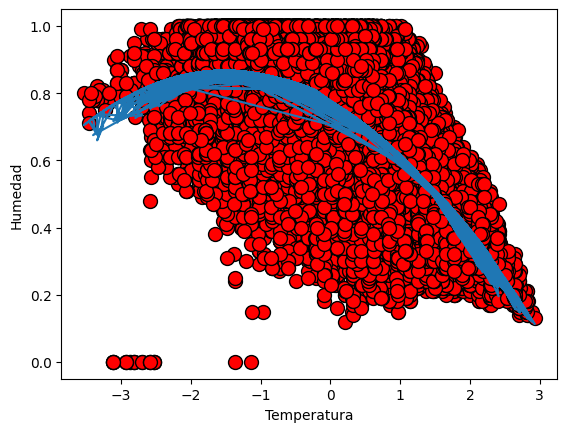

In [17]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [20]:
# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/Data sete lab 1/OTROS/weatherHistory.csv')
X = data.iloc[:, [3, 7]].values   # Selecciona todas las filas y las primeras 3 columnas, convierte a array NumPy
y = data.iloc[:, 5].values   # Selecciona todas las filas y la sexta columna, convierte a array NumPy
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [21]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [22]:
# Calcular los parámetros utilizando la ecuación de la normal
theta = normalEqn(X, y)

# Mostrar los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar la humedad para un conjunto específico de características
# En este caso, se usan la temperatura y la temperatura aparente

# Valores normalizados de temperature (9.472222222) y apparentTemperature (7.388888889)
X_array = [1, 9.472222222, 7.388888889, 0, 0]  # Agrega ceros para las características faltantes

# Calcular la humedad predicha utilizando los parámetros theta calculados
humidity_pred = np.dot(X_array, theta)

# Mostrar el resultado de la predicción de la humedad
print(f'Humedad predicha (usando el descenso por el gradiente): {humidity_pred:.2f}')


Theta calculado a partir de la ecuación de la normal: [ 8.53204824e-01 -1.35048588e-03  8.25144649e-05 -4.68087034e-04
 -1.77951968e-07]
Humedad predicha (usando el descenso por el gradiente): 0.84


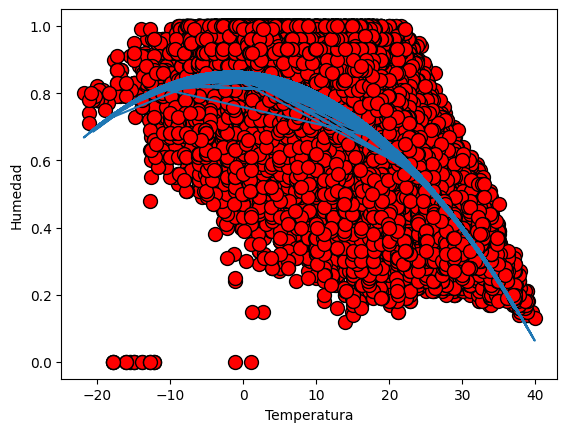

In [23]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [29]:
theta = normalEqn(X, y)

# Generar 100 predicciones
n_predictions = 100
predictions = []

# Obtener los rangos de temperatura y temperatura aparente de los datos originales
temp_min, temp_max = X_original[:, 0].min(), X_original[:, 0].max()
app_temp_min, app_temp_max = X_original[:, 1].min(), X_original[:, 1].max()

print("Generando 100 predicciones:")
for i in range(n_predictions):
    # Generar valores aleatorios dentro del rango de los datos originales
    temp = np.random.uniform(temp_min, temp_max)
    app_temp = np.random.uniform(app_temp_min, app_temp_max)

    # Crear el vector X_array con las características
    X_array = [1, temp, app_temp, temp**2, app_temp**2]

    # Calcular la humedad predicha
    humidity_pred = np.dot(X_array, theta)

    predictions.append((temp, app_temp, humidity_pred))

    print(f"Predicción {i+1}: Temperatura = {temp:.2f}, Temperatura Aparente = {app_temp:.2f}, Humedad Predicha = {humidity_pred:.2f}")



Generando 100 predicciones:
Predicción 1: Temperatura = -12.72, Temperatura Aparente = 42.39, Humedad Predicha = 0.80
Predicción 2: Temperatura = -16.40, Temperatura Aparente = 129.25, Humedad Predicha = 0.76
Predicción 3: Temperatura = 22.34, Temperatura Aparente = 304.31, Humedad Predicha = 0.60
Predicción 4: Temperatura = 15.98, Temperatura Aparente = 293.70, Humedad Predicha = 0.72
Predicción 5: Temperatura = 30.32, Temperatura Aparente = 46.76, Humedad Predicha = 0.39
Predicción 6: Temperatura = -10.04, Temperatura Aparente = 221.00, Humedad Predicha = 0.83
Predicción 7: Temperatura = -5.29, Temperatura Aparente = 323.22, Humedad Predicha = 0.86
Predicción 8: Temperatura = -18.68, Temperatura Aparente = 39.83, Humedad Predicha = 0.72
Predicción 9: Temperatura = -17.63, Temperatura Aparente = 202.60, Humedad Predicha = 0.74
Predicción 10: Temperatura = 19.41, Temperatura Aparente = 140.39, Humedad Predicha = 0.66
Predicción 11: Temperatura = 13.84, Temperatura Aparente = 292.21, Hu